In [1]:
import numpy as np
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
from mass_assign import *
from grav_potential import *
from acceleration import *

In [5]:
ng = 16
num_par = 1000

pars_pos = (np.random.rand(num_par, 2)*ng).astype(np.float32)
pars_vel = (np.random.rand(num_par, 2)).astype(np.float32)
# pars_mass = np.random.rand(num_par).astype(np.float32)*100
pars_mass = np.ones_like(pars_pos[:,0]).astype(np.float32)

# pars_pos = np.array([[8.1,11.1],[8.1,10.1]]).astype(np.float32)
# pars_vel = np.array([[10,0],[0,0]]).astype(np.float32)
# pars_mass = np.array((0.00001,1)).astype(np.float32)

pars_df = pd.DataFrame({'pos_x': pars_pos[:,0], 'pos_y': pars_pos[:,1],
                        'vel_x': pars_vel[:,0], 'vel_y': pars_vel[:,1],
                        'mass': pars_mass})

# Info array: (num_par, 5)
# Position_x, Position_y, Velocity_x, Velocity_y, Mass
pars_info = pars_df.loc[:, ['pos_x', 'pos_y', 'vel_x', 'vel_y', 'mass']].values
pars_info.shape

(1000, 5)

(0.0, 16.0)

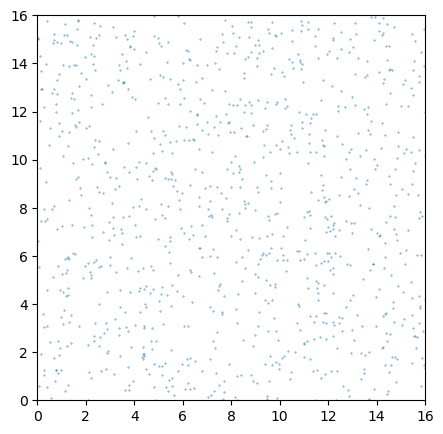

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(pars_info[:, 0], pars_info[:, 1], s=0.1,)
ax.set_ylim(0, ng)
ax.set_xlim(0, ng)

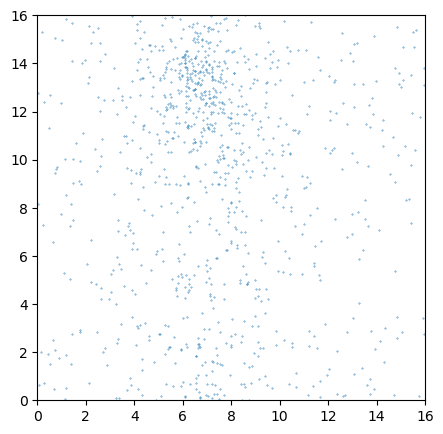

In [7]:
dt = 0.01

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_ylim(0, ng)
ax.set_xlim(0, ng)
for step in range(100):
    pars_info[:, 0:2] += pars_info[:, 2:4] * 0.5 * dt # Fitrst step:
    # Boundary conditions:
    pars_info[:, 0:2] = pars_info[:, 0:2]%ng

    dens = cic_density_2d(pars_info[:,[0,1,4]], ng, h=1)
    phi = grav_phi_2d(dens, h=1)
    acc_mesh_x, acc_mesh_y = acc_mesh_2d(phi,h=1)
    acc_par_x, acc_par_y = acc_par_2d(pars_info[:,[0,1]], acc_mesh_x, acc_mesh_y, h=1)

    pars_info[:, 2:4] += np.array([acc_par_x, acc_par_y]).T * dt # Second step
    pars_info[:, 0:2] += pars_info[:, 2:4] * 0.5 * dt # Third step
    # Boundary conditions:
    pars_info[:, 0:2] = pars_info[:, 0:2]%ng

ax.scatter(pars_info[:, 0], pars_info[:, 1], s=0.1,)
# ax.set_ylim(0, ng)
# ax.set_ylim(0, ng)